# **Projeto SN Ia - Parte 1**

Vamos, no decorrer desta primeira parte, entender o comportamento da distância de luminosidade $D_L$. Para isso deveremos antes compreender como funciona outros tipos de distâncias como a comóvel $D_C$ e a de Hubble $D_H$. No caso da distância comóvel, como ela é obtida por meio de uma integral, iremos comparar os resultados numéricos em vários casos onde a integral possa ser resolvida analiticamente (e.g. Universo vazio, só de matéria, só de constante cosmológica, etc...). Também iremos mostrar a diferença dos resultados numéricos e analíticos em função do redshift até $z=10$.

> **a)** Para começar, vamos criar uma função que calcule a distância de luminosidade. Para encontrá-la é necessário o cálculo de uma integral numérica. Por isso, vamos definí-la antes de encontrá-la.


Para determinar a distância de luminosidade $D_L$ de acordo como o artigo de Hoog, temos que calcular a seguinte expressão:
$$D_L = (1 + z)D_M$$
onde
\begin{align}
    D_M = \begin{cases}
      D_H \dfrac{1}{\sqrt{\Omega_k}}\sinh\left[\dfrac{D_C}{D_H}\sqrt{\Omega_k}\right] & \text{para } \Omega_k > 0\\
      D_C & \text{para } \Omega_k = 0\\
      D_H \dfrac{1}{\sqrt{\Omega_k}}\sin\left[\dfrac{D_C}{D_H}\sqrt{\Omega_k}\right] & \text{para } \Omega_k < 0
    \end{cases}
\end{align}

e $D_H$ é a distância de Hubble $$D_H = \dfrac{c}{H_0}$$
e $D_C$ é a distância comóvel na direção da linha de visada $$D_C = D_H \displaystyle\int^{z}_{0} \dfrac{dz'}{E(z')}$$
e $$E(z) = \sqrt{\Omega_M (1 + z)^3 + \Omega_k (1 + z)^2 +\Omega_{EE}(1+z)^{3(1+w)}}$$

Importando as bibliotecas

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install astropy
%pip install scipy
%pip install matplotx

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotx
from astropy.cosmology import LambdaCDM
from scipy import integrate

Escolhemos a regra do trapézio como método de integração para integrar $\displaystyle\int^{z}_{0} = \dfrac{dz'}{E(z')}$

In [3]:
def ez(z, omega_m, omega_ee, omega_k, w):
  return np.sqrt(omega_m*(1+z)**3+omega_k*(1+z)**2+omega_ee*(1+z)**(3*(1+w)))

def integral(z, H, omega_m, omega_ee, omega_k, w):
  integral = 0
  soma = 0
  i = z/100000
  h = z/100000

  while i < z:
    soma += 1/ez(i,omega_m,omega_ee,omega_k, w)
    i += h

  integral = h*(0.5*ez(0,omega_m,omega_ee,omega_k, w) + soma + 0.5*ez(z,omega_m,omega_ee,omega_k, w))
  return integral

Função para calcular a $D_L$

In [18]:
def dist(z, H, omega_m, omega_ee, w):

  omega_k = 1 - omega_m - omega_ee

  c = 3*10**5 # km/s
  dh = c/H
  dc = dh*integral(z, H, omega_m, omega_ee, omega_k, w)
  if omega_k == 0:
    dm = dc
  elif omega_k > 0:
    dm = (dh/np.sqrt(omega_k))*np.sinh(np.sqrt(omega_k)*dc/dh)
  else:
    dm = (dh/np.sqrt(-omega_k))*np.sin(np.sqrt(-omega_k)*dc/dh)

  dl = (1+z)*dm

  mod_dist = 5*np.log10(dl*100000)

  return dl, mod_dist, dc, dh

Entrada do usuário (para utilizar é necessário tirar os "#"):

In [21]:
#z = float(input('Digite o valor de z: '))
#H = float(input('Digite o valor de H: '))
#omega_m = float(input('Digite o valor de omega_m: '))
#omega_ee = float(input('Digite o valor de omega_ee: '))
#w = float(input('Digite o valor de w: '))

#l = dist(z, H, omega_m, omega_ee, w)
#print("Distância de Luminosidade = %.2f" %l[0], "Mpc")
#print("Módulo de Distância = %.2f" %l[1], "Mpc")
#print("Distância Comóvel = %.2f" %l[2], "Mpc")
#print("Distância de Hubble = %.2f" %l[3], "Mpc")

Entrada de teste (valores aleatórios)

In [20]:
z = 1
H = 70
omega_m = 0
omega_ee = 1
w = -1

l = dist(z, H, omega_m, omega_ee, w)
print("Distância de Luminosidade = %.2f" %l[0], "Mpc")
print("Módulo de Distância = %.2f" %l[1], "Mpc")
print("Distância Comóvel = %.2f" %l[2], "Mpc")
print("Distância de Hubble = %.2f" %l[3], "Mpc")

Distância de Luminosidade = 8571.51 Mpc
Módulo de Distância = 44.67 Mpc
Distância Comóvel = 4285.76 Mpc
Distância de Hubble = 4285.71 Mpc


Teste de compatibilidade usando a função *(luminosity_distance(z) do pacote astropy)* para um Universo Dominado por $\Omega_{EE}$

In [22]:
print("Distância de Luminosidade obtida   = %.2f" %l[0],'Mpc')

cosmo = LambdaCDM(H0=70, Om0=0, Ode0=1)
D_lambdaCDM = str(cosmo.luminosity_distance(z))
D_lambdaCDM = float(D_lambdaCDM[:9])
print("Distância de Luminosidade esperada = %.2f" %D_lambdaCDM,'Mpc') 

Erro = ((l[0] - D_lambdaCDM)/D_lambdaCDM)*100
print("Erro = %.3f" %Erro, "%")

Distância de Luminosidade obtida   = 8571.51 Mpc
Distância de Luminosidade esperada = 8565.50 Mpc
Erro = 0.070 %


> **b)** Iremos agora, antes de prosseguir na nossa análise, comparar o método análitico e a nossa função para um Universo dominado por $\Omega_{EE}$, ou seja, $\Omega_m = 0$, $\Omega_k = 0$ e $\Omega_{EE} = 1$.

Aplicando as formulas dadas no inicio deste trabalho, encontramos que $D_L$ assumirá a seguinte forma:

$$D_L = \dfrac{cz}{H_0}(1 + z)$$

In [23]:
def d_LEE(z, c, H):
  d_L = ((c*z)/H)*(1 + z)
  return d_L

In [71]:
z = np.arange(0.01, 10, 0.1)

c = 3*10**5 # km/s
H = 70
dh = c/H
omega_m = 0
omega_ee = 1
w = -1

eixo_y_EE = np.array([])

for a in z:
  l = dist(a, H, omega_m, omega_ee, w)
  eixo_y_EE  = np.append(eixo_y_EE, (H/c)*l[0])

eixo_y_d_LEE = np.array([])

for a in z:
  D_L = d_LEE(a, c, H)
  eixo_y_d_LEE  = np.append(eixo_y_d_LEE, (H/c)*D_L)

erro = eixo_y_EE - eixo_y_d_LEE

plt.style.use(matplotx.styles.dracula)
plt.subplot(2, 1, 1)
plt.plot(z, eixo_y_EE, linestyle='dashdot', linewidth=2, color='white', label = 'Numérico')
plt.plot(z, eixo_y_d_LEE, linestyle='-', color='red', label = 'Analítico')
plt.title('$\\Omega_{EE} = 1$')
plt.ylabel('$D_{L}\\frac{H_{0}}{c}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.xlim(0, 10)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z, erro, linestyle='-', color='yellow', label = 'erro')
plt.ylabel('Erro', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.legend()

In [ ]:
def ez(z, omega_m, omega_ee, omega_k, w):
  return np.sqrt(omega_m*(1+z)**3+omega_k*(1+z)**2+omega_ee*(1+z)**(3*(1+w)))

def integral(z, H, omega_m, omega_ee, omega_k, w):
  integral = 0
  soma = 0
  i = z/100000
  h = z/100000

  while i < z:
    soma += 1/ez(i,omega_m,omega_ee,omega_k, w)
    i += h

  integral = h*(0.5*ez(0,omega_m,omega_ee,omega_k, w) + soma + 0.5*ez(z,omega_m,omega_ee,omega_k, w))
  return integral

> **c)** Iremos agora, antes de prosseguir na nossa análise, comparar o método análitico e a nossa função para um Universo dominado por $\Omega_{m}$, ou seja, $\Omega_m = 1$, $\Omega_k = 0$ e $\Omega_{EE} = 0$.

Aplicando as formulas dadas no inicio desta página encontramos que $D_L$ assumirá a seguinte forma:

$$D_L = \dfrac{c(1+z)^2}{H_0}\left(2 - \frac{2}{\sqrt{1 + z}}\right)$$

In [ ]:
def d_Lm(z, c, H):
  d_L = ((c*((1+z)**2))/H)*(2 - (2/(np.sqrt(1+z))))
  return d_L

Text(0.5, 0, 'z')

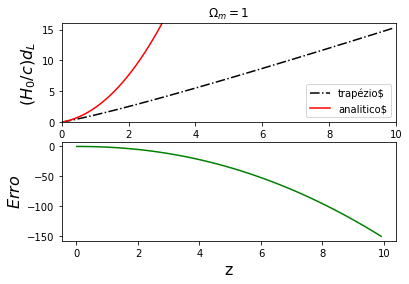

In [ ]:
z = np.arange(0.01, 10, 0.1)

c = 3*10**5 # km/s
H = 70
dh = c/H
omega_m = 1
omega_ee = 0
w = 0

eixo_y_m = np.array([])

for a in z:
  l = dist(a, H, omega_m, omega_ee, w)
  eixo_y_m  = np.append(eixo_y_m, (H/c)*l[0])

eixo_y_d_Lm = np.array([])

for a in z:
  D_L = d_Lm(a, c, H)
  eixo_y_d_Lm  = np.append(eixo_y_d_Lm, (H/c)*D_L)

erro = eixo_y_m - eixo_y_d_Lm

plt.subplot(2, 1, 1)
plt.plot(z,eixo_y_m, 's', marker='', linestyle='dashdot', color='black', label = 'trapézio$')
plt.plot(z,eixo_y_d_Lm, 's', marker='', linestyle='-', color='red', label = 'analitico$')
plt.title('$\Omega_{m} = 1$')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,10)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z,erro, 's', marker='', linestyle='-', color='green', label = 'erro$')
plt.ylabel('$Erro$', fontsize=16)
plt.xlabel('z', fontsize=16)

> **d)** Iremos agora, antes de prosseguir na nossa análise, comparar o método análitico e a nossa função para um Universo dominado por $\Omega_{k}$, ou seja, $\Omega_k = 0$, $\Omega_k = 1$ e $\Omega_{EE} = 0$.

Aplicando as formulas dadas no inicio desta página encontramos que $D_L$ assumirá a seguinte forma:

$$D_L = \dfrac{c(1+z)}{H_0}\ln(1+z)$$

In [ ]:
def d_Lk(z, c, H):
  d_L = ((c*((1+z)))/H) * np.log(1 + z)
  return d_L

Text(0.5, 0, 'z')

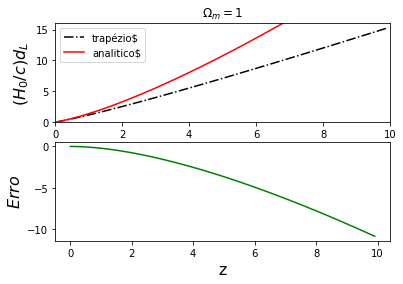

In [ ]:
z = np.arange(0.01, 10, 0.1)

c = 3*10**5 # km/s
H = 70
dh = c/H
omega_m = 0
omega_ee = 0
w = -1

eixo_y_k = np.array([])

for a in z:
  l = dist(a, H, omega_m, omega_ee, w)
  eixo_y_k  = np.append(eixo_y_k, (H/c)*l[0])

eixo_y_d_Lk = np.array([])

for a in z:
  D_L = d_Lk(a, c, H)
  eixo_y_d_Lk  = np.append(eixo_y_d_Lk, (H/c)*D_L)

erro = eixo_y_m - eixo_y_d_Lk

plt.subplot(2, 1, 1)
plt.plot(z,eixo_y_m, 's', marker='', linestyle='dashdot', color='black', label = 'trapézio$')
plt.plot(z,eixo_y_d_Lk, 's', marker='', linestyle='-', color='red', label = 'analitico$')
plt.title('$\Omega_{m} = 1$')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,10)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z,erro, 's', marker='', linestyle='-', color='green', label = 'erro$')
plt.ylabel('$Erro$', fontsize=16)
plt.xlabel('z', fontsize=16)

> **e)** Nós iremos agora reproduzir a figura abaixo (apresentada como Figura 6.2 no livro de cosmologia de Bárbara Ryder):

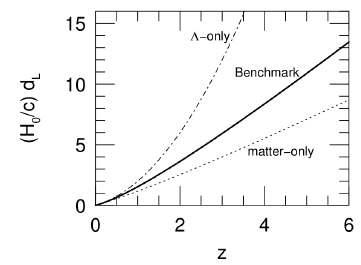

Universo dominado pelo parâmetro de energia escura: $\Omega_m =0 $, $\Omega_{EE}=1$ e $w=-1$

In [ ]:
z = np.arange(0.01, 6, 0.05)

c = 3*10**5 # km/s
H = 70
dh = c/H

eixo_y_EE = np.array([])

for a in z:
  l = dist(a, H, 0, 1, -1)
  eixo_y_EE  = np.append(eixo_y_EE, (H/c)*l[0])

Universo dominado pela matéria: $\Omega_m =1 $, $\Omega_{EE}=0$ e $w=0$

In [ ]:
z = np.arange(0.01, 6, 0.05)

c = 3*10**5 # km/s
H = 70
dh = c/H

eixo_y_m = np.array([])

for a in z:
  l = dist(a, H, 1, 0, 0)
  eixo_y_m  = np.append(eixo_y_m, (H/c)*l[0])

Benchmark $\Omega_m = 0.31 $, $\Omega_{EE} = 0.69$ e $w = -1$

In [ ]:
z = np.arange(0.01, 6, 0.05)

c = 3*10**5 # km/s
H = 70
dh = c/H

eixo_y_bench = np.array([])

for a in z:
  l = dist(a, H, 0.31, 0.69, -1)
  eixo_y_bench  = np.append(eixo_y_bench, (H/c)*l[0])

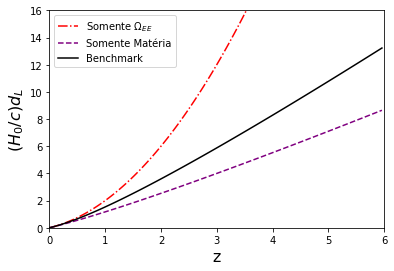

In [ ]:
plt.plot(z,eixo_y_EE, 's', marker='', linestyle='dashdot', color='red', label = 'Somente $\Omega_{EE}$')
plt.plot(z,eixo_y_m, 's', marker='', linestyle='--', color='purple', label = 'Somente Matéria')
plt.plot(z,eixo_y_bench, 's', marker='', linestyle='-', color='black', label = 'Benchmark')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,6)
plt.legend()

> **f)** Agora vamos testar a precisão da equação abaixo (dita equação 6.31 do livro de cosmologia da Bárbara Ryder), para os três casos da figura acima e o mesmo intervalo de redshift.

$$d_L ≈ \dfrac{c}{H_0}(1 + \dfrac{1-q_0}{2}z)$$

In [ ]:
def d_L(z, omega_m, omega_ee, dh):
  q0 = 0.5*omega_m - omega_ee
  d_L = dh * z * ((1 + ((1 - q0)/2))*z)
  return d_L

Universo dominado por $\Omega_{EE}$:  

$$\Omega_m = 0,\; \Omega_{EE} = 1\;\mathrm{e}\; w = -1$$

Text(0.5, 0, 'z')

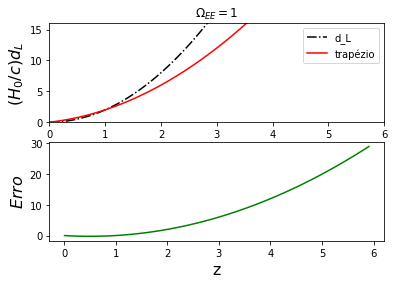

In [ ]:
z = np.arange(0.01, 6, 0.1)
c = 3*10**5 # km/s
H = 70 #km/(s*Mpc)
omega_m = 0
omega_ee = 1
w = -1
dh = c/H

eixo_y_d_L = np.array([])
for a in z:
  l = d_L(a, omega_m, omega_ee, dh)
  eixo_y_d_L  = np.append(eixo_y_d_L, (H/c)*l)

eixo_y_EE = np.array([])

for a in z:
  l = dist(a, H, omega_m, omega_ee, w)
  eixo_y_EE  = np.append(eixo_y_EE, (H/c)*l[0])

erro = eixo_y_d_L - eixo_y_EE

plt.subplot(2, 1, 1)
plt.plot(z,eixo_y_d_L, 's', marker='', linestyle='dashdot', color='black', label = 'd_L')
plt.plot(z,eixo_y_EE, 's', marker='', linestyle='-', color='red', label = 'trapézio')
plt.title('$\Omega_{EE} = 1$')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,6)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z,erro, 's', marker='', linestyle='-', color='green', label = 'erro$')
plt.ylabel('$Erro$', fontsize=16)
plt.xlabel('z', fontsize=16)

Universo dominado por $\Omega_{m}$:  

$$\Omega_m = 1, \;\Omega_{EE} = 0\; \mathrm{e}\; w = 0$$

Text(0.5, 0, 'z')

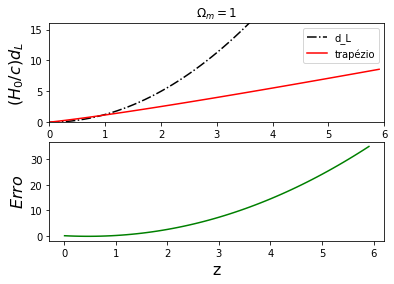

In [ ]:
z = np.arange(0.01, 6, 0.1)
c = 3*10**5 # km/s
H = 70 #km/(s*Mpc)
omega_m = 1
omega_ee = 0
w = 0
dh = c/H

eixo_y_d_L = np.array([])
for a in z:
  l = d_L(a, omega_m, omega_ee, dh)
  eixo_y_d_L  = np.append(eixo_y_d_L, (H/c)*l)

eixo_y_m = np.array([])

for a in z:
  l = dist(a, H, 1, 0, 0)
  eixo_y_m  = np.append(eixo_y_m, (H/c)*l[0])

erro = eixo_y_d_L - eixo_y_m

plt.subplot(2, 1, 1)
plt.plot(z,eixo_y_d_L, 's', marker='', linestyle='dashdot', color='black', label = 'd_L')
plt.plot(z,eixo_y_m, 's', marker='', linestyle='-', color='red', label = 'trapézio')
plt.title('$\Omega_{m} = 1$')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,6)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z,erro, 's', marker='', linestyle='-', color='green', label = 'erro$')
plt.ylabel('$Erro$', fontsize=16)
plt.xlabel('z', fontsize=16)

Universo Vazio:  $\Omega_{k} = 1$

$$\Omega_m = 0, \;\Omega_{EE} = 0\; \mathrm{e}\; w = 0$$

Text(0.5, 0, 'z')

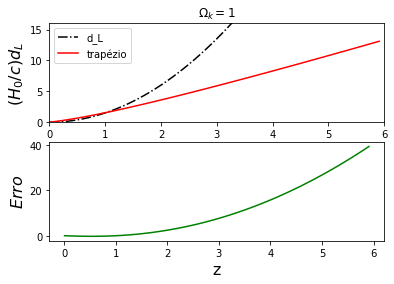

In [ ]:
z = np.arange(0.01, 6, 0.1)
c = 3*10**5 # km/s
H = 70 #km/(s*Mpc)
omega_m = 0
omega_ee = 0
w = 0
dh = c/H

eixo_y_d_L = np.array([])
for a in z:
  l = d_L(a, omega_m, omega_ee, dh)
  eixo_y_d_L  = np.append(eixo_y_d_L, (H/c)*l)

eixo_y_bench = np.array([])

for a in z:
  l = dist(a, H, 0.31, 0.69, -1)
  eixo_y_bench  = np.append(eixo_y_bench, (H/c)*l[0])

erro = eixo_y_d_L - eixo_y_bench

plt.subplot(2, 1, 1)
plt.plot(z,eixo_y_d_L, 's', marker='', linestyle='dashdot', color='black', label = 'd_L')
plt.plot(z,eixo_y_bench, 's', marker='', linestyle='-', color='red', label = 'trapézio')
plt.title('$\Omega_{k} = 1$')
plt.ylabel('$(H_{0}/c)d_{L}$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.ylim(0,16)
plt.xlim(0,6)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(z,erro, 's', marker='', linestyle='-', color='green', label = 'erro$')
plt.ylabel('$Erro$', fontsize=16)
plt.xlabel('z', fontsize=16)

> **g)** Ignorando as correções K e por extinção, vamos calcular a magnitude aparente de um objeto em $z=1$, com magnitude absoluta $M=-19,05$ nos casos abaixo:

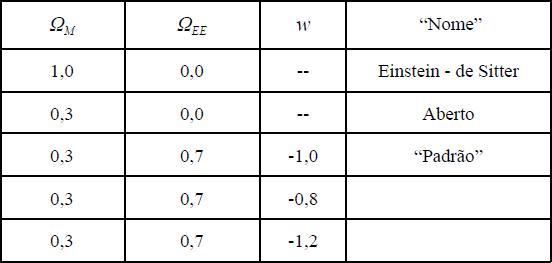


A função **dist(z,H,omega_m,omega_ee,w)** criada anteriormente nos retorna o valor da distância de luminosidade e também o valor do módulo da distância $\mu$. Lembrando que $\mu = m - M$, onde $M$ é a magnitude absoluta e $m$ é a magnitude aparente, dado que $M = -19,05$, pode-se encontrar o valor de $m$.

In [ ]:
M = -19.05

# modelo Einstein de Sitter
mi1 = dist(1,70,1,0,0)[1]
m1 = mi1 + M

# modelo Aberto
mi2 = dist(1,70,0.3,0,0)[1]
m2 = mi2 + M

# modelo Padrão
mi3 = dist(1,70,0.3,0.7,-1)[1]
m3 = mi3 + M

# modelo 4
mi4 = dist(1,70,0.3,0.7,-0.8)[1]
m4 = mi4 + M

# modelo 5
mi5 = dist(1,70,0.3,0.7,-1.2)[1]
m5 = mi5 + M

print("No modelo Einstein de Sitter m = %.2f" %m1, "\n No modelo Aberto m = %.2f" %m2, "\n No modelo Padrão m = %.2f" %m3, "\n No modelo 4 m = %.2f" %m4, "\n No modelo 5 m = %.2f" %m5)

No modelo Einstein de Sitter m = 24.45 
 No modelo Aberto m = 24.80 
 No modelo Padrão m = 25.05 
 No modelo 4 m = 24.96 
 No modelo 5 m = 25.13




---
# **Projeto SN Ia - Parte 2**



**De agora em diante, usaremos os dados coletados do Redshift de Supernovas do tipo Ia (dados.csv) na nossa análise.**

> **a)** Vamos calcular o melhor valor (máxima verossimilhança) e os intervalos de $68,3$%, $95,4$% e $99,7$% ($1$, $2$, $3$ “$\sigma$” de uma distribuição Normal) para o $\Omega_{EE}$, supondo $w=-1$ e um Universo Plano.  Além disso, sabendo sobre a  probabilidade que $P(\Omega_{EE}) ∝ e^{-\chi^2}$, também vamos calcular a probabilidade desses dados indicarem que a densidade da energia escura é maior do que $0.5$:

$$\dfrac{\int_{0.5}^{+\infty} P(\Omega_{EE})d\Omega_{EE}}{\displaystyle\int_{-\infty}^{+\infty} P(\Omega_{EE})d\Omega_{EE}}$$

Em problemas unidimensionais, com este, $\Delta\chi = 1.0, 4.0, 9.0$ para (1, 2, 3 “$\sigma$”).


In [ ]:
url = 'https://raw.githubusercontent.com/Geovannisz/SN_Ia/main/dados.csv'
dados = pd.read_csv("https://raw.githubusercontent.com/Geovannisz/SN_Ia/main/dados.csv", delimiter= " ")
dados.head()

,redshift,modulo_de_distancia,erro_do_mod_dist
0,0.028488,35.339320,0.223906
1,0.050043,36.669580,0.166829
2,0.052926,36.804163,0.155756
3,0.070086,37.428796,0.158467
4,0.062668,37.467377,0.156099


Vamos definir $\chi^2$, para isso, deve-se lembrar que ele é dado por:
$$χ^2 = \displaystyle\sum_i\dfrac{[\mu_i(z_i) - μ(z_i,\Omega_M,\Omega_{EE},w)]^2}{\sigma_{\mu_i}^2}$$

In [ ]:
#Calcula chi2
def chi2(modelo, obs, inc):
  return ((modelo - obs)/inc)**2

chi^2 mínimo: 818.3044978119215
Omega_EE que minimiza o chi^2: 0.5765761523046092


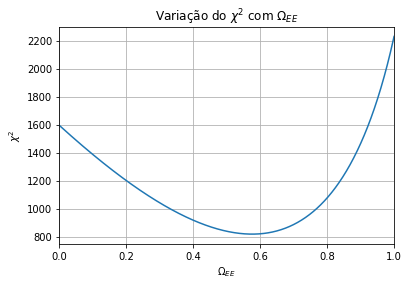

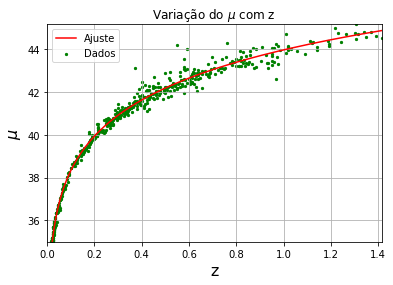

In [ ]:
c = 3e5 # velocidade da luz em km/s
H0 = 70 # constante de hubble em km/(s*Mpc)
dh = c/H0 # distância de hubble em Mpc
w = -1

def ez(z, omega_k, omeg_m, omeg_l, w):
  return 1/np.sqrt(omeg_m*(1+z)**3+omega_k*(1+z)**2+omeg_l*(1+z)**(3*(1+w)))

def dist(z, omega_m, omega_ee, w):
  omega_k = 1 - omega_m - omega_ee
  dm = dh * integrate.romberg(ez, 0, z, args=(omega_k, omega_m, omega_ee, w))
  dl = (1+z)*dm
  return dl

#Calcula a curva
def curva(x, omega_m, omega_ee, w):
  d_L = dist(x, omega_m, omega_ee, w)
  return (5*np.log10(d_L) + 25)

x = []
y = []
erro = []
for i in range(len(dados)):
  x.append(dados["redshift"][i])
  y.append(dados["modulo_de_distancia"][i])
  erro.append(dados["erro_do_mod_dist"][i])

omega_ee = np.linspace(float(0.001), float(1), 999)
omega_m = []
for i in range(0, len(omega_ee)):
    omega_mi = 1- omega_ee[i]
    omega_m.append(omega_mi)

# Cálculo dos chi^2:

chi = []
for i in range(0, len(omega_ee)):
  om_mi = omega_m[i]
  om_eei = omega_ee[i]
  chi_i = 0
  for j in range(0, len(x)):
    xj = x[j]
    yj = y[j]
    erroj = erro[j]
    mod = curva(xj, om_mi, om_eei, -1)
    chi_i += chi2(mod, yj, erro)[0]
  chi.append(chi_i)

omega_ee_min = omega_ee[chi.index(min(chi))]
print("chi^2 mínimo:", min(chi))
print("Omega_EE que minimiza o chi^2:", omega_ee_min)

plt.plot(omega_ee, chi)
plt.xlabel('$\Omega_{EE}$')
plt.ylabel('$\chi^{2}$')
plt.title("Variação do $\chi^{2}$ com $\Omega_{EE}$")
plt.xlim(0,1)
plt.grid()
plt.show()

w = -1
omega_ee = omega_ee_min

mod_dist = []
for i in range(0,len(x),1):
    model_i = curva(x[i], 1 - omega_ee_min, omega_ee_min, w)
    mod_dist.append(model_i)

a = sorted(x)
b = sorted(mod_dist)

plt.plot(a,b,color="r",label = "Ajuste")
plt.scatter(x,y,s=5,color="g",label = "Dados")
plt.grid()
plt.ylabel('$\mu$', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.title("Variação do $\mu$ com z")
plt.ylim(35,max(y))
plt.xlim(0,max(x))
plt.legend()

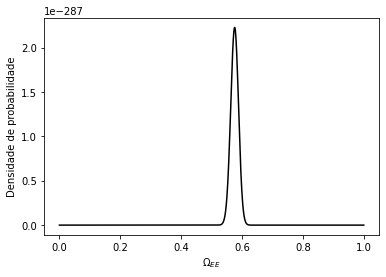

A probabilidade de om_EE ser maior que 0.5 é: 0.9999999952214427


In [ ]:
def prob_dens(chi):
  pdf = np.exp(-chi/float(1.239777))
  return pdf

omega_ee = np.linspace(float(0.001), float(1), 999)
pdf = []
for i in range(0, len(omega_ee)):
  pdf.append(prob_dens(chi[i]))

# Fazer a integral pelo método dos retângulos pra facilitar
n = len(omega_ee)

# Vetor com as distâncias entre os pontos:
h = []

for i in range(1, n, 1):
	h_i = omega_ee[i] - omega_ee[i-1]
	h.append(h_i)

# Integral do numerador:
int_1 = 0
for i in range(0, n-1, 1):
  if omega_ee[i] >= 0.5:
    int_1 += h[i]*(pdf[i])

# Integral do denominador:

int_2 = 0
for i in range(0, n-1, 1):
  int_2 += h[i] * (pdf[i])

plt.plot(omega_ee, pdf, color='k')
plt.xlabel("$\Omega_{EE}$")
plt.ylabel("Densidade de probabilidade")
plt.show()

print("A probabilidade de om_EE ser maior que 0.5 é:", (int_1/int_2))

> **b)** Calcularemos agora o melhor valor (máxima verossimilhança) e os intervalos de $68,3$%, $95,4$% e $99,7$% ($1$, $2$, $3$ “$\sigma$” de uma distribuição Normal) para $\Omega_M$ e $\Omega_{EE}$ , supondo $w=-1$.

In [ ]:
z = dados["redshift"]
mod_dist = dados["modulo_de_distancia"]
erro = dados["erro_do_mod_dist"]

In [ ]:
c = 3e5 # velocidade da luz em km/s
H0 = 70 # constante de hubble em km/(s*Mpc)
dh = c/H0 # distância de hubble em Mpc
w = -1

def ez(z, omega_k, omeg_m, omeg_l, w):
  return 1/np.sqrt(omeg_m*(1+z)**3+omega_k*(1+z)**2+omeg_l*(1+z)**(3*(1+w)))

def dist(z, omega_m, omega_ee, w):

  omega_k = 1 - omega_m - omega_ee

  dc = dh * integrate.romberg(ez, 0, z, args=(omega_k, omega_m, omega_ee, w))
  if omega_k == 0:
    dm = dc
  elif omega_k > 0:
    dm = (dh/np.sqrt(omega_k))*np.sinh(np.sqrt(omega_k)*dc/dh)
  else:
    dm = (dh/np.sqrt(-omega_k))*np.sin(np.sqrt(-omega_k)*dc/dh)

  dl = (1+z)*dm

  return dl

In [ ]:
#Calcula m_model_i
def m_modeli(z, omega_m, omega_ee, w):

  d_L = dist(z, omega_m, omega_ee, w)

  return (5*np.log10(d_L) + 25)

#Calcula chi2
def chi_quad(m_i, m_mod_i, s_i):
  return ((m_i - m_mod_i)/s_i)**2

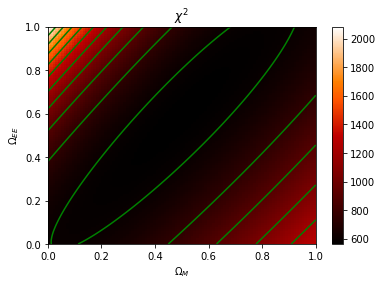

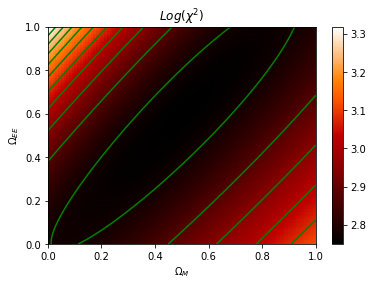

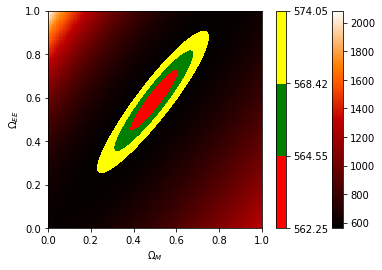

In [ ]:
Omega_EE_max = float(1)
Omega_EE_min = float(0)
Omega_m_max = float(1)
Omega_m_min = float(0)
n = 100 #numero de pontos do vetor

omega_m = np.linspace(Omega_m_min, Omega_m_max, n)
omega_ee = np.linspace(Omega_EE_min, Omega_EE_max, n)
OMEGA_M, OMEGA_EE = np.meshgrid(omega_m, omega_ee)

chi = []
chi_min = 1000000000
omega_m_min = omega_m[0]
omega_ee_min = omega_ee[0]

for j in range(len(OMEGA_M)):
  linha_chi = []

  for k in range(len(OMEGA_M[j])):
    chi_i = 0

    for i in range(len(z)):
      m_mod_ijk = m_modeli(z[i], OMEGA_M[j][k], OMEGA_EE[j][k], w)
      m_i = mod_dist[i]
      chi_i += chi_quad(m_i, m_mod_ijk, erro[i])

    linha_chi.append(chi_i)

    if chi_i < chi_min:
      indice_chi_min_j = j
      indice_chi_min_k = k
      chi_min = chi_i
      omega_m_min = OMEGA_M[j][k]
      omega_ee_min = OMEGA_EE[j][k]

  chi.append(linha_chi)

chi = np.array(chi)

int_conf = [2.3, 6.17, 11.8] #Deltas chi^2
level_elip = [chi_min, chi_min + int_conf[0], chi_min + int_conf[1], chi_min + int_conf[2]] #intervalos de confiança

plt.pcolormesh(OMEGA_M, OMEGA_EE, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(OMEGA_M, OMEGA_EE, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.title("$\chi^2$")
plt.show()

plt.pcolormesh(OMEGA_M, OMEGA_EE, np.log10(chi), cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(OMEGA_M, OMEGA_EE, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.title("$Log(\chi^2)$")
plt.show()

plt.pcolormesh(OMEGA_M, OMEGA_EE, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contourf(OMEGA_M, OMEGA_EE, chi, level_elip, colors=['red', 'green', 'yellow'])
plt.colorbar()
plt.title("")
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.show()

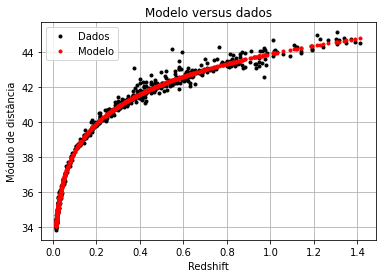

chi^2_min: 562.25
Omega_m do chi_min: 0.49
Omega_ee de chi_min: 0.59


In [ ]:
# Comparação entre modelo e dados
model = []
for i in range(0,len(z),1):
    model_i = m_modeli(z[i], omega_m_min, omega_ee_min, -1)
    model.append(model_i)

plt.plot(z, mod_dist, color='k', linestyle="", marker='.', label = "Dados")
plt.plot(z, model, color='r', linestyle="", marker='.', label = "Modelo")
plt.legend()
plt.title("Modelo versus dados")
plt.ylabel("Módulo de distância")
plt.xlabel("Redshift")
plt.grid()
plt.show()

print("chi^2_min: %.2f" %chi_min)
print("Omega_m do chi_min: %.2f" %omega_m_min)
print("Omega_ee de chi_min: %.2f" %omega_ee_min)

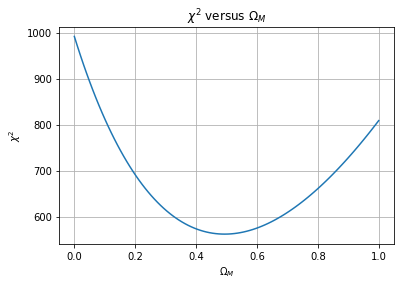

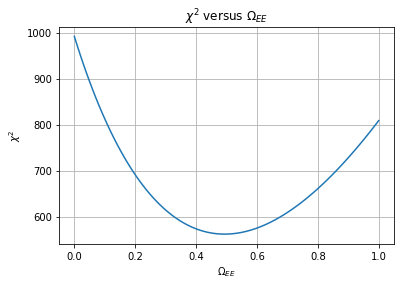

In [ ]:
plt.plot(omega_m, chi[indice_chi_min_j])
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $\Omega_{M}$")
plt.grid()
plt.show()

plt.plot(omega_ee, chi[indice_chi_min_j])
plt.xlabel('$\Omega_{EE}$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $\Omega_{EE}$")
plt.grid()
plt.show()

In [ ]:
# Encontra os valores extremos dos intervalos
def encont_inter(chi, OMEGA_M, OMEGA_EE):
  int_omega_m_68 = [-2, 2]
  int_omega_m_95 = [-2, 2]
  int_omega_m_99 = [-2, 2]

  int_omega_ee_68 = [-2, 2]
  int_omega_ee_95 = [-2, 2]
  int_omega_ee_99 = [-2, 2]

  int_con = [2.3, 6.17, 11.8] # Deltas chi^2

  for i in range(len(chi)):

    for j in range(len(chi[0])):

      if (chi[i][j] < (chi_min + int_con[0])):

        if OMEGA_M[i][j] > int_omega_m_68[0]:
          int_omega_m_68[0] = OMEGA_M[i][j]

        elif OMEGA_M[i][j] < int_omega_m_68[1]:
          int_omega_m_68[1] = OMEGA_M[i][j]

        if OMEGA_EE[i][j] > int_omega_ee_68[0]:
          int_omega_ee_68[0] = OMEGA_EE[i][j]

        elif OMEGA_EE[i][j] < int_omega_ee_68[1]:
          int_omega_ee_68[1] = OMEGA_EE[i][j]

      elif (chi[i][j] < (chi_min + int_con[1])):

        if OMEGA_M[i][j] > int_omega_m_95[0]:
          int_omega_m_95[0] = OMEGA_M[i][j]

        elif OMEGA_M[i][j] < int_omega_m_95[1]:
          int_omega_m_95[1] = OMEGA_M[i][j]

        if OMEGA_EE[i][j] > int_omega_ee_95[0]:
          int_omega_ee_95[0] = OMEGA_EE[i][j]

        elif OMEGA_EE[i][j] < int_omega_ee_95[1]:
          int_omega_ee_95[1] = OMEGA_EE[i][j]

      elif (chi[i][j] < (chi_min + int_con[2])):

        if OMEGA_M[i][j] > int_omega_m_99[0]:
          int_omega_m_99[0] = OMEGA_M[i][j]

        elif OMEGA_M[i][j] < int_omega_m_99[1]:
          int_omega_m_99[1] = OMEGA_M[i][j]

        if OMEGA_EE[i][j] > int_omega_ee_99[0]:
          int_omega_ee_99[0] = OMEGA_EE[i][j]

        elif OMEGA_EE[i][j] < int_omega_ee_99[1]:
          int_omega_ee_99[1] = OMEGA_EE[i][j]

  return int_omega_m_68, int_omega_m_95, int_omega_m_99, int_omega_ee_68, int_omega_ee_95, int_omega_ee_99

In [ ]:
intervalos = encont_inter(chi, OMEGA_M, OMEGA_EE)

int_omega_m_68 = intervalos[0]
int_omega_m_95 = intervalos[1]
int_omega_m_99 = intervalos[2]
int_omega_ee_68 = intervalos[3]
int_omega_ee_95 = intervalos[4]
int_omega_ee_99 = intervalos[5]

print("Intervalo de confiança de 68: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_68[1], int_omega_m_68[0], int_omega_ee_68[1], int_omega_ee_68[0]))
print("Intervalo de confiança de 95: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_95[1], int_omega_m_95[0], int_omega_ee_95[1], int_omega_ee_95[0]))
print("Intervalo de confiança de 99: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_99[1], int_omega_m_99[0], int_omega_ee_99[1], int_omega_ee_99[0]))

Intervalo de confiança de 68: Omega_M = [0.38, 0.61], Omega_EE = [0.45, 0.73]
Intervalo de confiança de 95: Omega_M = [0.31, 0.68], Omega_EE = [0.35, 0.82]
Intervalo de confiança de 99: Omega_M = [0.23, 0.75], Omega_EE = [0.26, 0.90]


> c) Agora, calcularemos o melhor valor (máxima verossimilhança) e as os intervalos de $68,3$%, $95,4$% e $99,7$% ($1$, $2$, $3$ “$\sigma$” de uma distribuição Normal) para $\Omega_M$ e $\Omega_{EE}$ , supondo $w=-1$ e com um prior na curvatura vinda da CMB: $\Omega_K = -0,06\pm 0,05$. Para isso simplesmente  adicionaremos ao valor do $\chi^2$ um termo $[(1- \Omega_M -\Omega_{EE}) + 0,06]^2/0,05^2]$ e procederemos como no caso anterior.

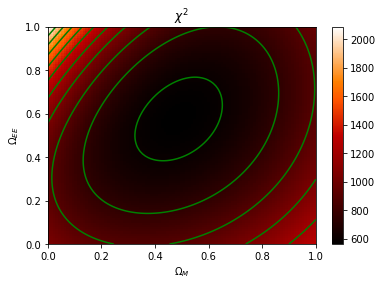

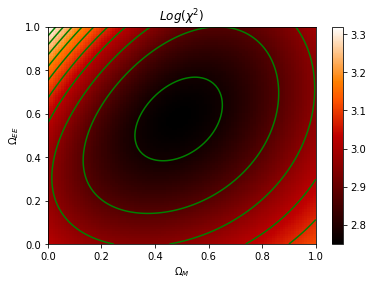

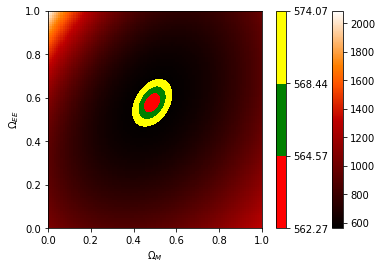

In [ ]:
chi_min = 1000000000
omega_m_min = OMEGA_M[0][0]
omega_ee_min = OMEGA_EE[0][0]

for i in range(len(chi)):

  for j in range(len(chi[0])):
    chi[i][j] += ((1 - OMEGA_M[i][j] - OMEGA_EE[i][j]) + 0.06)**2/(0.05**2)

    if chi[i][j] < chi_min:
      indice_chi_min_j = j
      indice_chi_min_k = k
      chi_min = chi[i][j]
      omega_m_min = OMEGA_M[i][j]
      omega_ee_min = OMEGA_EE[i][j]

int_conf = [2.3, 6.17, 11.8] #Deltas chi^2
level_elip = [chi_min, chi_min + int_conf[0], chi_min + int_conf[1], chi_min + int_conf[2]] #intervalos de confiança

plt.pcolormesh(OMEGA_M, OMEGA_EE, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(OMEGA_M, OMEGA_EE, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.title("$\chi^2$")
plt.show()

plt.pcolormesh(OMEGA_M, OMEGA_EE, np.log10(chi), cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(OMEGA_M, OMEGA_EE, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.title("$Log(\chi^2)$")
plt.show()

plt.pcolormesh(OMEGA_M, OMEGA_EE, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contourf(OMEGA_M, OMEGA_EE, chi, level_elip, colors=['red', 'green', 'yellow'])
plt.colorbar()
plt.title("")
plt.xlabel("$\Omega_{M}$")
plt.ylabel("$\Omega_{EE}$")
plt.show()

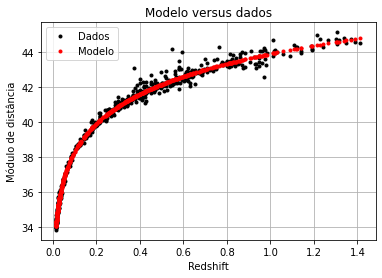

chi^2_min: 562.27
Omega_m de chi_min: 0.48
Omega_ee de chi_min: 0.58


In [ ]:
# comparação entre modelo e dados
model = []
for i in range(0,len(z),1):
    model_i = m_modeli(z[i], omega_m_min, omega_ee_min, -1)
    model.append(model_i)

plt.plot(z, mod_dist, color='k', linestyle="", marker='.', label = "Dados")
plt.plot(z, model, color='r', linestyle="", marker='.', label = "Modelo")
plt.legend()
plt.title("Modelo versus dados")
plt.ylabel("Módulo de distância")
plt.xlabel("Redshift")
plt.grid()
plt.show()

print("chi^2_min: %.2f" %chi_min)
print("Omega_m de chi_min: %.2f" %omega_m_min)
print("Omega_ee de chi_min: %.2f" %omega_ee_min)

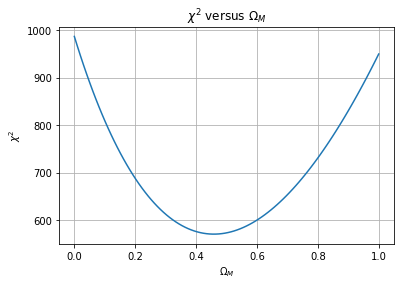

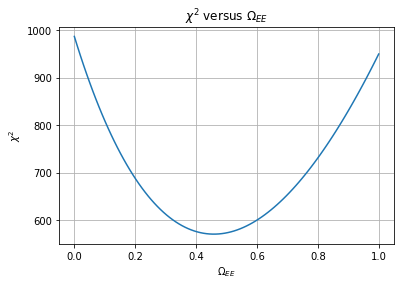

In [ ]:
plt.plot(omega_m, chi[indice_chi_min_j])
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $\Omega_{M}$")
plt.grid()
plt.show()

plt.plot(omega_ee, chi[indice_chi_min_j])
plt.xlabel('$\Omega_{EE}$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $\Omega_{EE}$")
plt.grid()
plt.show()

In [ ]:
intervalos = encont_inter(chi, OMEGA_M, OMEGA_EE)

int_omega_m_68 = intervalos[0]
int_omega_m_95 = intervalos[1]
int_omega_m_99 = intervalos[2]
int_omega_ee_68 = intervalos[3]
int_omega_ee_95 = intervalos[4]
int_omega_ee_99 = intervalos[5]

print("Intervalo de confiança de 68: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_68[1], int_omega_m_68[0], int_omega_ee_68[1], int_omega_ee_68[0]))
print("Intervalo de confiança de 95: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_95[1], int_omega_m_95[0], int_omega_ee_95[1], int_omega_ee_95[0]))
print("Intervalo de confiança de 99: Omega_M = [%.2f, %.2f], Omega_EE = [%.2f, %.2f]" %(int_omega_m_99[1], int_omega_m_99[0], int_omega_ee_99[1], int_omega_ee_99[0]))

Intervalo de confiança de 68: Omega_M = [0.45, 0.53], Omega_EE = [0.54, 0.62]
Intervalo de confiança de 95: Omega_M = [0.42, 0.55], Omega_EE = [0.51, 0.65]
Intervalo de confiança de 99: Omega_M = [0.40, 0.58], Omega_EE = [0.47, 0.68]



> **d)** Calcule o melhor valor (máxima verossimilhança) e as os intervalos de $68,3$%, $95,4$% e $99,7$% ($1$, $2$, $3$ “$\sigma$” de uma distribuição Normal) para $\Omega_M$ e $w$, supondo um Universo plano.

In [ ]:
c = 3e5 # velocidade da luz em km/s
H0 = 70 # constante de hubble em km/(s*Mpc)
dh = c/H0 # distância de hubble em Mpc

def dist2(z, omega_m, omega_ee, w):

  omega_k = 0

  dc = dh * integrate.romberg(ez, 0, z, args=(omega_k, omega_m, omega_ee, w))
  dl = (1+z)*dc

  return dl

In [ ]:
#Calcula m_model_i
def m_model_i(z, omega_m, omega_ee, w):

  d_L = dist2(z, omega_m, omega_ee, w)

  return (5*np.log10(d_L) + 25)

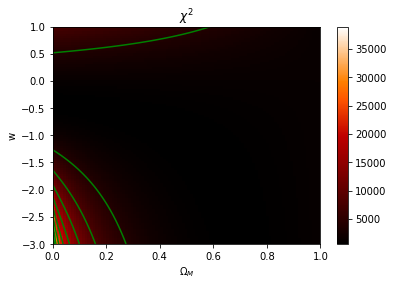

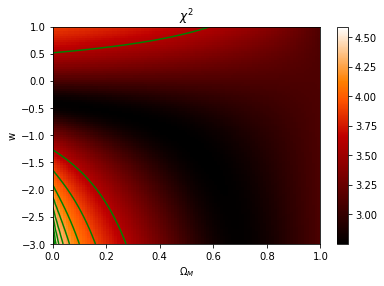

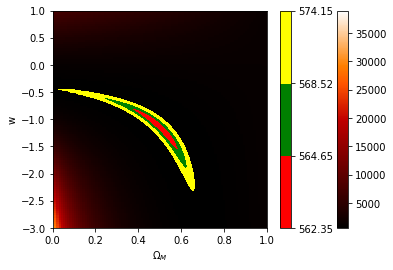

In [ ]:
Omega_m_max = float(1)
Omega_m_min = float(0)
w_max = float(1)
w_min = float(-3)
n = 100 #numero de pontos do vetor

omega_m = np.linspace(Omega_m_min, Omega_m_max, n)
vec_w = np.linspace(w_min, w_max, n)
Omega_M, W = np.meshgrid(omega_m, vec_w)

chi = []
chi_min = 1000000000
omega_m_min = omega_m[0]
w_min_1 = vec_w[0]

for j in range(len(Omega_M)):
  linha_chi = []

  for k in range(len(Omega_M[j])):
    chi_i = 0
    omega_ee = 1 - Omega_M[j][k]

    for i in range(len(z)):

      m_mod_ijk = m_model_i(z[i], Omega_M[j][k], omega_ee, W[j][k])
      m_i = mod_dist[i]
      chi_i += chi_quad(m_i, m_mod_ijk, erro[i])

    linha_chi.append(chi_i)

    if chi_i < chi_min:
      indice_chi_min_j = j
      indice_chi_min_k = k
      chi_min = chi_i
      omega_m_min = Omega_M[j][k]
      w_min_1 = W[j][k]

  chi.append(linha_chi)

chi = np.array(chi)


int_conf = [2.3, 6.17, 11.8] #Deltas chi^2
level_elip = [chi_min, chi_min + int_conf[0], chi_min + int_conf[1], chi_min + int_conf[2]] #intervalos de confiança

plt.pcolormesh(Omega_M, W, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(Omega_M, W, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("w")
plt.title("$\chi^2$")
plt.show()

plt.pcolormesh(Omega_M, W, np.log10(chi), cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contour(Omega_M, W, chi, 10, colors='green')
plt.xlabel("$\Omega_{M}$")
plt.ylabel("w")
plt.title("$\chi^2$")
plt.show()

plt.pcolormesh(Omega_M, W, chi, cmap=plt.get_cmap('gist_heat'))
plt.colorbar()
plt.contourf(Omega_M, W, chi, level_elip, colors=['red', 'green', 'yellow'])
plt.colorbar()
plt.title("")
plt.xlabel("$\Omega_{M}$")
plt.ylabel("w")
plt.show()

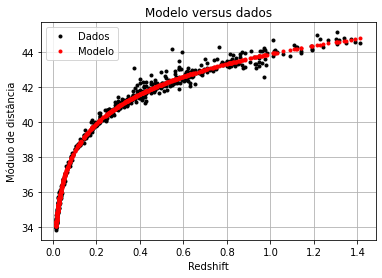

chi^2_min: 562.35
Omega_m do chi_min: 0.51
w do do chi_min: -1.14


In [ ]:
# Comparação entre modelo e dados
model = []

omega_ee = 1- omega_m_min # omega_ee dado o omega_m que minimiza chi2

for i in range(0,len(z),1):
    model_i = m_model_i(z[i], omega_m_min, omega_ee, w_min_1)
    model.append(model_i)

plt.plot(z, mod_dist, color='k', linestyle="", marker='.', label = "Dados")
plt.plot(z, model, color='r', linestyle="", marker='.', label = "Modelo")
plt.legend()
plt.title("Modelo versus dados")
plt.ylabel("Módulo de distância")
plt.xlabel("Redshift")
plt.grid()
plt.show()

print("chi^2_min: %.2f" %chi_min)
print("Omega_m do chi_min: %.2f" %omega_m_min)
print("w do do chi_min: %.2f" %w_min_1)

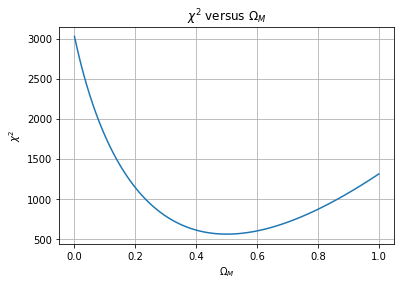

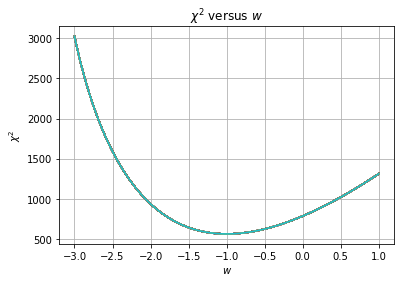

In [ ]:
plt.plot(omega_m, chi[indice_chi_min_j])
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $\Omega_{M}$")
plt.grid()
plt.show()


plt.plot(W, chi[indice_chi_min_j])
plt.xlabel('$w$')
plt.ylabel('$\chi^{2}$')
plt.title("$\chi^{2}$ versus $w$")
plt.grid()
plt.show()

In [ ]:
intervalos = encont_inter(chi, OMEGA_M, W)

int_omega_m_68 = intervalos[0]
int_omega_m_95 = intervalos[1]
int_omega_m_99 = intervalos[2]
int_w_68 = intervalos[3]
int_w_95 = intervalos[4]
int_w_99 = intervalos[5]

print("Intervalo de confiança de 68: Omega_M = [%.2f, %.2f], w = [%.2f, %.2f]" %(int_omega_m_68[1], int_omega_m_68[0], int_w_68[1], int_w_68[0]))
print("Intervalo de confiança de 95: Omega_M = [%.2f, %.2f], w = [%.2f, %.2f]" %(int_omega_m_95[1], int_omega_m_95[0], int_w_95[1], int_w_95[0]))
print("Intervalo de confiança de 99: Omega_M = [%.2f, %.2f], w = [%.2f, %.2f]" %(int_omega_m_99[1], int_omega_m_99[0], int_w_99[1], int_w_99[0]))

Intervalo de confiança de 68: Omega_M = [0.36, 0.59], w = [-1.55, -0.78]
Intervalo de confiança de 95: Omega_M = [0.23, 0.63], w = [-1.87, -0.62]
Intervalo de confiança de 99: Omega_M = [0.03, 0.66], w = [-2.31, -0.45]
